In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("gold_data_2015_25.csv")

df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date").sort_index()

# data exploration
df.head()
df.info()
df.describe()

#data cleaning
df.isnull().sum()
df = df.sort_values("Date")
df[["GLD","SPX","USO","SLV","EUR/USD"]] = (
    df[["GLD","SPX","USO","SLV","EUR/USD"]].ffill().bfill()
)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2666 entries, 2015-01-02 to 2025-08-14
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SPX      2666 non-null   float64
 1   GLD      2666 non-null   float64
 2   USO      2666 non-null   float64
 3   SLV      2666 non-null   float64
 4   EUR/USD  2666 non-null   float64
dtypes: float64(5)
memory usage: 125.0 KB


In [ ]:
# Calculate the 75th percentile of GLD values
gld_q75 = df["GLD"].quantile(0.75)

# Identify rows where GLD is greater than the 75th percentile
high_gld = df[df["GLD"] > gld_q75]
high_gld.head()

# Compute yearly statistics: mean, std, min, max, and count
yearly_stats = df["GLD"].groupby(df.index.year).agg(["mean", "std", "min", "max", "count"])
yearly_stats

,mean,std,min,max,count
Date,,,,,
2015,111.146032,5.598566,100.500000,125.230003,252
2016,119.362619,6.874395,102.889999,130.520004,252
2017,119.714940,3.133592,110.470001,128.130005,249
2018,120.177331,5.233800,111.099998,128.830002,251
2019,131.561872,8.609735,119.940002,146.660004,251
2020,166.653755,13.105411,138.039993,193.889999,253
2021,168.311230,4.617560,157.490005,182.869995,252
2022,167.905139,8.784454,151.229996,191.509995,251
2023,180.449880,5.493166,168.350006,192.589996,250


R² Score: 0.92097941768094
MAE: 8.510621751862274
Coefficients: {'SPX': np.float64(0.016458868362920525), 'USO': np.float64(-0.011537828052062826), 'SLV': np.float64(5.2468742070437004), 'EUR/USD': np.float64(-56.00269156118392)}


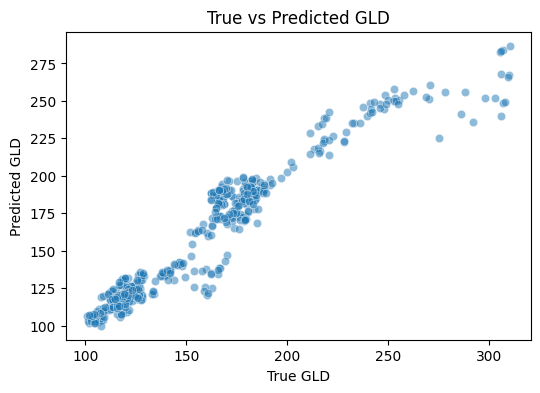

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Define features (SPX, USO, SLV, EUR/USD) and target (GLD)
X = df[["SPX", "USO", "SLV", "EUR/USD"]]
y = df["GLD"]

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate model performance
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("Coefficients:", dict(zip(X.columns, model.coef_)))

# Prediction Scatter Plot
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.title("True vs Predicted GLD")
plt.xlabel("True GLD")
plt.ylabel("Predicted GLD")
plt.show()

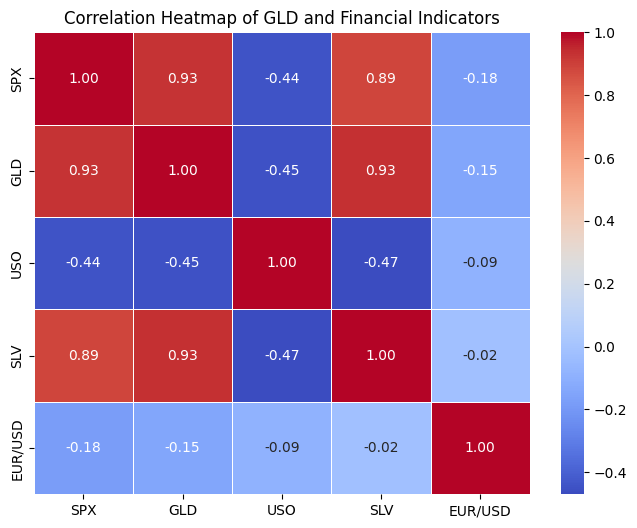

In [12]:
plt.figure(figsize=(8,6))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of GLD and Financial Indicators")
plt.show()